<h1>PROJECT: United Kingdom Road Accident Data Analysis </h1>
<h2> Inclusive Year: 2019 - 2022 </h2>
<h3>Analyst: Hernandez, Rina Rose</h3>

In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import f_oneway

<h1> Data Analytics Project </h1>
<h2> United Kingdom Road accident data analysis </h2>
<ul>
    <li>Inlusive years: 2019-2022</li>
</ul>

In [6]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [7]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [8]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [9]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [10]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [11]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions             object
District Area                object
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions      object
Road_Type                    object
Urban_or_Rural_Area          object
Weather_Conditions           object
Vehicle_Type                 object
dtype: object

In [12]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [13]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())

In [14]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [15]:
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())

In [16]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [17]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')

In [18]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  object  
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  object  
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  object  
 5   District Area            660679 non-null  object  
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  659953 non-null  category
 10  Road_Type                656159 non-null  object  
 11  Urban_or_Rural_Area      660664 non-null  object  
 12  Weather_Conditions       646551 non-null  object  
 13  Vehicle_Type             660679 non-null  ob

In [19]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])

In [20]:
accident.mode()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,2.01E+12,Slight,30/11/2019,52.458798,Daylight,Birmingham,-0.977611,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car


In [21]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [22]:
accident['Road_Type'] = accident['Road_Type'].astype('category')

In [23]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')

In [24]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')

In [25]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  object  
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  object  
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  object  
 5   District Area            660679 non-null  object  
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                656159 non-null  category
 11  Urban_or_Rural_Area      660664 non-null  category
 12  Weather_Conditions       646551 non-null  category
 13  Vehicle_Type             660679 non-null  ob

In [26]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [27]:
accident.mode()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,2.01E+12,Slight,30/11/2019,52.458798,Daylight,Birmingham,-0.977611,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car


In [28]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                   4520
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [29]:
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])

In [30]:
accident.mode()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,2.01E+12,Slight,30/11/2019,52.458798,Daylight,Birmingham,-0.977611,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car


In [31]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                      0
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [32]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [33]:
accident.mode()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,2.01E+12,Slight,30/11/2019,52.458798,Daylight,Birmingham,-0.977611,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car


In [34]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Converting Object to DataTime Data type </h1>

In [35]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce') 

In [36]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [37]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                       object
dtype: object

<h1>Categorical Data fields</h1>

In [38]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                       object
dtype: object

In [39]:
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')


In [40]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1>Extracting date Information using Pandas Date time</h1>

In [41]:
accident['year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [42]:
accident['year']

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
660674    2022
660675    2022
660676    2022
660677    2022
660678    2022
Name: year, Length: 660679, dtype: int32

<h1>Accident in Light Conditions</h1>

In [43]:
yr19 = accident[accident['year'] == 2019]
yr20 = accident[accident['year'] == 2020]
yr21 = accident[accident['year'] == 2021]
yr22 = accident[accident['year'] == 2022]


C:\Users\LAB5-StudentPC12\AppData\Local\Temp\ipykernel_12612\1771843919.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visual = newyr19.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()


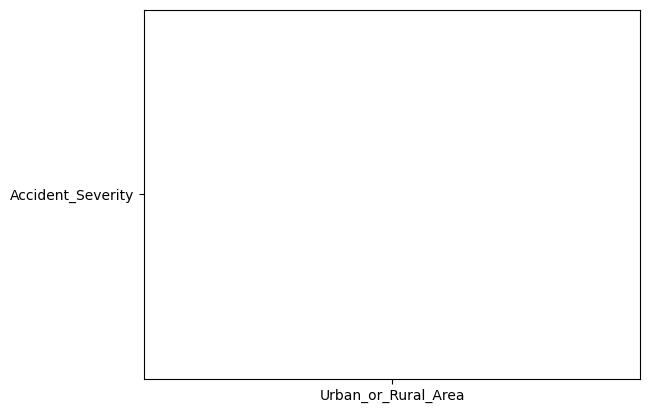

In [44]:
yr19 = accident[accident['year'] == 2019]
yr19['Accident_Severity'].value_counts()

newyr19 = yr19[yr19['Accident_Severity'] != 'Slight']

visual = newyr19.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()
visual

#Plotting using matplot
x = ['Urban_or_Rural_Area']
y = ['Accident_Severity']

plt.bar(x,y)
plt.show()


In [45]:
yr19['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

In [46]:
yr19['Light_Conditions'].value_counts().sum()

np.int64(182115)

In [47]:
yr20['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       124552
Darkness - lights lit           33473
Darkness - no lighting          10067
Darkness - lighting unknown      1792
Darkness - lights unlit           707
Name: count, dtype: int64

In [48]:
yr20['Light_Conditions'].value_counts().sum()

np.int64(170591)

In [49]:
yr21['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       119518
Darkness - lights lit           32549
Darkness - no lighting           9226
Darkness - lighting unknown      1607
Darkness - lights unlit           654
Name: count, dtype: int64

In [50]:
yr21['Light_Conditions'].value_counts().sum()

np.int64(163554)

In [51]:
yr22['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       107768
Darkness - lights lit           27544
Darkness - no lighting           7302
Darkness - lighting unknown      1317
Darkness - lights unlit           488
Name: count, dtype: int64

In [52]:
yr22['Light_Conditions'].value_counts().sum()


np.int64(144419)

In [53]:
year=[
    '2019', '2020', '2021', '2022'
]


visual2 = accident.groupby(['Light_Conditions', 'year'])['Number_of_Casualties'].sum().reset_index()
visual2



C:\Users\LAB5-StudentPC12\AppData\Local\Temp\ipykernel_12612\510484011.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visual2 = accident.groupby(['Light_Conditions', 'year'])['Number_of_Casualties'].sum().reset_index()


,Light_Conditions,year,Number_of_Casualties
0,Darkness - lighting unknown,2019,2306
1,Darkness - lighting unknown,2020,2336
2,Darkness - lighting unknown,2021,2122
3,Darkness - lighting unknown,2022,1707
4,Darkness - lights lit,2019,49165
5,Darkness - lights lit,2020,45776
6,Darkness - lights lit,2021,44499
7,Darkness - lights lit,2022,37668
8,Darkness - lights unlit,2019,932
9,Darkness - lights unlit,2020,915


<h1>INSIGHTS:</h1>
<ul>
    <li>Daylight(most number of accident in Light Conditions)2019-2022</li>
    <li>Darkness -light unlit(least number of accident)2019-2022</li>
</ul>

In [54]:
accident['Accident Date'].dt.year.value_counts()

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h1>INSIGHTS:</h1>
<ul>
    <li>2019 is the year with the highest number of accident, while 2022, has the lowest number of accident</li>
</ul>

In [55]:
accident['Accident Date'].dt.year.value_counts().sum()

np.int64(660679)

<h1>INSIGHTS:(naka roundoff na po)</h1>
<ul>
    <li>27.56% of total number of accident in Year 2019</li>
    <li>25.82% of total number of accident in Year 2020</li>
    <li>24.76% of total number of accident in Year 2021</li>
    <li>21.86% of total number of accident in Year 2022</li>
</ul>


<h1>What month has the highest number of accident</h1>

In [56]:
accident['Accident Date'].dt.month.value_counts()

Accident Date
11    60424
10    59580
7     57445
6     56481
9     56455
5     56352
3     54086
8     53913
1     52872
12    51836
4     51744
2     49491
Name: count, dtype: int64

<h1>INSIGHTS:</h1>
<ul>
    <li>November is the month with the highest number of accident</li>
</ul>

In [57]:
plt.figure()

accident['Accident Date'].dt.month.value_counts()

Accident Date
11    60424
10    59580
7     57445
6     56481
9     56455
5     56352
3     54086
8     53913
1     52872
12    51836
4     51744
2     49491
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

<h1>What type of Vehicle are proned to accident</h1>

In [58]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2>Insights: Car is prone to accident</h2>

<h1>Percentage in Accident Severity </h1>

In [59]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [60]:
accident['Accident_Severity'].value_counts().sum()

np.int64(660679)

<h1>INSIGHTS:</h1>
<h2>85.34% of the accident are in Slight Conditions</h2>
<h2>13.35% of the accident are in Serious Conditions</h2>
<h2> 1.31% of the accident are in Serious Conditions</h2>

<h1>INSIGHT 1</h1>
<h2> Accident severity in Kensington and Chelsea Area </h2>

In [61]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [62]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [63]:
accident[(accident['Accident_Severity'] == 'Serious') & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      370
Accident_Severity          370
Accident Date              370
Latitude                   370
Light_Conditions           370
District Area              370
Longitude                  370
Number_of_Casualties       370
Number_of_Vehicles         370
Road_Surface_Conditions    370
Road_Type                  370
Urban_or_Rural_Area        370
Weather_Conditions         370
Vehicle_Type               370
year                       370
Month                      370
Day                        370
DayOfWeek                  370
dtype: int64

In [64]:
accident[(accident['Accident_Severity'] == 'Slight') & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      2412
Accident_Severity          2412
Accident Date              2412
Latitude                   2412
Light_Conditions           2412
District Area              2412
Longitude                  2412
Number_of_Casualties       2412
Number_of_Vehicles         2412
Road_Surface_Conditions    2412
Road_Type                  2412
Urban_or_Rural_Area        2412
Weather_Conditions         2412
Vehicle_Type               2412
year                       2412
Month                      2412
Day                        2412
DayOfWeek                  2412
dtype: int64

In [65]:
accident[(accident['Accident_Severity'] == 'Fatal') & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      17
Accident_Severity          17
Accident Date              17
Latitude                   17
Light_Conditions           17
District Area              17
Longitude                  17
Number_of_Casualties       17
Number_of_Vehicles         17
Road_Surface_Conditions    17
Road_Type                  17
Urban_or_Rural_Area        17
Weather_Conditions         17
Vehicle_Type               17
year                       17
Month                      17
Day                        17
DayOfWeek                  17
dtype: int64

<h1>INSIGHT 2</h1>
<h2> Accident Severity in HighLand Area</h2>

In [66]:
accident[(accident['Accident_Severity'] == 'Slight') & (accident['District Area'] == 'Highland')].count()

Index                      1589
Accident_Severity          1589
Accident Date              1589
Latitude                   1589
Light_Conditions           1589
District Area              1589
Longitude                  1589
Number_of_Casualties       1589
Number_of_Vehicles         1589
Road_Surface_Conditions    1589
Road_Type                  1589
Urban_or_Rural_Area        1589
Weather_Conditions         1589
Vehicle_Type               1589
year                       1589
Month                      1589
Day                        1589
DayOfWeek                  1589
dtype: int64

In [67]:
accident[(accident['Accident_Severity'] == 'Fatal') & (accident['District Area'] == 'Highland')].count()

Index                      88
Accident_Severity          88
Accident Date              88
Latitude                   88
Light_Conditions           88
District Area              88
Longitude                  88
Number_of_Casualties       88
Number_of_Vehicles         88
Road_Surface_Conditions    88
Road_Type                  88
Urban_or_Rural_Area        88
Weather_Conditions         88
Vehicle_Type               88
year                       88
Month                      88
Day                        88
DayOfWeek                  88
dtype: int64

In [68]:
accident[(accident['Accident_Severity'] == 'Serious') & (accident['District Area'] == 'Highland')].count()

Index                      344
Accident_Severity          344
Accident Date              344
Latitude                   344
Light_Conditions           344
District Area              344
Longitude                  344
Number_of_Casualties       344
Number_of_Vehicles         344
Road_Surface_Conditions    344
Road_Type                  344
Urban_or_Rural_Area        344
Weather_Conditions         344
Vehicle_Type               344
year                       344
Month                      344
Day                        344
DayOfWeek                  344
dtype: int64

In [69]:
accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [70]:
accident[(accident['Accident_Severity'] == 'Serious') & (accident['District Area'] == 'Birmingham')].count()

Index                      1474
Accident_Severity          1474
Accident Date              1474
Latitude                   1474
Light_Conditions           1474
District Area              1474
Longitude                  1474
Number_of_Casualties       1474
Number_of_Vehicles         1474
Road_Surface_Conditions    1474
Road_Type                  1474
Urban_or_Rural_Area        1474
Weather_Conditions         1474
Vehicle_Type               1474
year                       1474
Month                      1474
Day                        1474
DayOfWeek                  1474
dtype: int64

In [71]:
accident[(accident['Accident_Severity'] == 'Fatal') & (accident['District Area'] == 'Birmingham')].count()

Index                      105
Accident_Severity          105
Accident Date              105
Latitude                   105
Light_Conditions           105
District Area              105
Longitude                  105
Number_of_Casualties       105
Number_of_Vehicles         105
Road_Surface_Conditions    105
Road_Type                  105
Urban_or_Rural_Area        105
Weather_Conditions         105
Vehicle_Type               105
year                       105
Month                      105
Day                        105
DayOfWeek                  105
dtype: int64

In [72]:
accident[(accident['Accident_Severity'] == 'Slight') & (accident['District Area'] == 'Birmingham')].count()

Index                      11912
Accident_Severity          11912
Accident Date              11912
Latitude                   11912
Light_Conditions           11912
District Area              11912
Longitude                  11912
Number_of_Casualties       11912
Number_of_Vehicles         11912
Road_Surface_Conditions    11912
Road_Type                  11912
Urban_or_Rural_Area        11912
Weather_Conditions         11912
Vehicle_Type               11912
year                       11912
Month                      11912
Day                        11912
DayOfWeek                  11912
dtype: int64

<h1>What is the most common type in Road Surface Conditions </h1>

In [73]:
road_sur_con = accident['Road_Surface_Conditions'].mode()[0]

In [74]:
road_sur_con

'Dry'

<h2>Insight3: The most common Road Surface Conditions is the Dry conditions</h2>

<h1>Number of Casualties in year 2019</h1>

In [75]:
yr19 = accident[accident['year'] == 2019]

In [76]:
yr19

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182110,2.01E+12,Slight,2019-12-20,54.985289,Darkness - no lighting,Dumfries and Galloway,-3.210294,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,20,4
182111,2.01E+12,Serious,2019-12-21,54.984105,Daylight,Dumfries and Galloway,-3.193693,2,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,21,5
182112,2.01E+12,Slight,2019-12-23,55.166369,Darkness - no lighting,Dumfries and Galloway,-2.992068,1,1,Frost or ice,Single carriageway,Rural,Fog or mist,Van / Goods 3.5 tonnes mgw or under,2019,12,23,0
182113,2.01E+12,Slight,2019-12-23,54.995154,Darkness - lights lit,Dumfries and Galloway,-3.058338,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,12,23,0


In [77]:
yr19['Number_of_Casualties'].value_counts().sum()

np.int64(182115)

<h2>Insight4: There are 182,155 casualties in total, year 2019</h2>

<h1>Number of Casualties in year 2020</h1>

In [78]:
yr20 = accident[accident['year'] == 2020]

In [79]:
yr20['Number_of_Casualties'].value_counts().sum()

np.int64(170591)

<h2>Insight5: There are 170,591 casualties in year 2020</h2>

<h1>Number of Casualties in year 2021</h1>

In [80]:
yr21 = accident[accident['year'] == 2021]

In [81]:
yr21['Number_of_Casualties'].value_counts().sum()

np.int64(163554)

<h2>Insight6: There are 163,554 casualties in year 2021</h2>

<h1>Number of Casualties in year 2022</h1>

In [82]:
yr22 = accident[accident['year'] == 2022] 

In [83]:
yr22['Number_of_Casualties'].value_counts().sum()

np.int64(144419)

<h2>Insight7: There are 144,419 casualties in year 2022</h2>

<h1>How many accident happened in Rural_Urban area (2019)</h1>

In [84]:
yr19 = accident[accident['year'] == 2019]
yr19['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          114552
Rural           67558
Unallocated         5
Name: count, dtype: int64

<h2>Insight 8: In 2019, Most accident happened in Urban Area  </h2>

<h1>How many accident happened in Rural_Urban area (2020)</h1>

In [85]:
yr20 = accident[accident['year'] == 2020]
yr20['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          108594
Rural           61991
Unallocated         6
Name: count, dtype: int64

<h2>Insight 9: Just like the insight 8, but in year 2020. Most accident happened in Urban Area </h2>

<h1>How many accident happened in Rural_Urban area (2021)</h1>

In [86]:
yr21 = accident[accident['year'] == 2021]
yr21['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          104538
Rural           59016
Unallocated         0
Name: count, dtype: int64

<h2>Insight 10: There are 104538 accident happened in Urban area while in Rural are 59016</h2>

<h1>How many accident happened in Rural_Urban area (2022)</h1>

In [87]:
yr22 = accident[accident['year'] == 2022]
yr22['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          93994
Rural          50425
Unallocated        0
Name: count, dtype: int64

<h2>Insight 11: There are 93,994 accident happened in Urban area while in Rural are 50425</h2>

<h1> INSIGHT 12</h1>

In [88]:
accident_insight = accident.groupby(['Number_of_Casualties', 'Accident Date']).size()

In [89]:
accident_insight

Number_of_Casualties  Accident Date
1                     2019-01-01       240
                      2019-01-02       284
                      2019-01-03       294
                      2019-01-04       306
                      2019-01-05       342
                                      ... 
45                    2020-09-26         1
47                    2020-07-17         1
48                    2021-12-22         1
62                    2020-08-18         1
68                    2019-01-03         1
Length: 9056, dtype: int64

<h1> Insight 13: Most common type of vehicle prone to accident</h1>

In [90]:
accident['Vehicle_Type'].mode()[0]

'Car'

<h1>What is the common Weather Conditions</h1>

In [91]:
weather_con = accident['Weather_Conditions'].mode()[0]

In [92]:
weather_con

'Fine no high winds'

<h2>Insight 14: The most common weather conditions is fine no high winds </h2>

<h1>Accident by District Area</h1>

In [93]:
accidentbyDistrict = accident['District Area'].value_counts()

In [94]:
accidentbyDistrict

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h2>Insight 15: BIRMINGHAM the most number of accident </h2>

<h1>16: what is the total number of Casualties in All accident?</h1>

In [95]:
sum_casualties = accident['Number_of_Casualties'].sum()

In [96]:
sum_casualties

np.int64(896568)

<h2>Insight16: The total number of Casualties happened in all accident is around 896,568 </h2>

<h1> What is the total Number_of_Vehicles in All accident?</h1>

In [97]:
sum_vehicles = accident['Number_of_Vehicles'].sum()

In [98]:
sum_vehicles

np.int64(1209872)

<h2>Insight17.</h2>

<h1> Which District Area have the most number of Casualties</h1>

In [99]:
casualties_district = accident.groupby('District Area')['Number_of_Casualties'].sum()

C:\Users\LAB5-StudentPC12\AppData\Local\Temp\ipykernel_12612\1293022102.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casualties_district = accident.groupby('District Area')['Number_of_Casualties'].sum()


In [100]:
casualties_district

District Area
Aberdeen City    1508
Aberdeenshire    2529
Adur              817
Allerdale        1663
Alnwick           351
                 ... 
Wychavon         1943
Wycombe          2442
Wyre             1706
Wyre Forest      1340
York             2453
Name: Number_of_Casualties, Length: 422, dtype: int64

<h2>Insight18: So the Aberdeen City has the most number of Casualties</h2>

<h1>19</h1>

In [101]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [102]:
accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts()

C:\Users\LAB5-StudentPC12\AppData\Local\Temp\ipykernel_12612\1246519302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts()


Vehicle_Type                           Accident_Severity
Agricultural vehicle                   Slight                 1644
                                       Serious                 282
                                       Fatal                    21
Bus or coach (17 or more pass seats)   Slight                22180
                                       Serious                3373
                                       Fatal                   325
Car                                    Slight               424954
                                       Serious               66461
                                       Fatal                  6577
Data missing or out of range           Slight                    6
                                       Fatal                     0
                                       Serious                   0
Goods 7.5 tonnes mgw and over          Slight                14770
                                       Serious                2321
     

<h1>Insight 20:</h1>

In [103]:
casualties_roadWeather = accident.groupby(['Road_Type', 'Weather_Conditions'])['Number_of_Casualties'].sum().unstack()

C:\Users\LAB5-StudentPC12\AppData\Local\Temp\ipykernel_12612\807559471.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casualties_roadWeather = accident.groupby(['Road_Type', 'Weather_Conditions'])['Number_of_Casualties'].sum().unstack()


In [104]:
casualties_roadWeather

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Road_Type,,,,,,,,
Dual carriageway,2191,116022,1136,3246,3000,19598,257,1427
One way street,187,13482,36,381,200,1775,15,96
Roundabout,720,45619,293,1408,706,6911,46,382
Single carriageway,8610,537717,3615,17939,9562,82663,924,6380
Slip road,148,8035,46,262,153,1282,13,85


In [105]:
percentage_weather = casualties_roadWeather.div(casualties_roadWeather.sum().sum())*100

In [106]:
percentage_weather

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Road_Type,,,,,,,,
Dual carriageway,0.244376,12.940680,0.126705,0.362047,0.334609,2.185891,0.028665,0.159162
One way street,0.020857,1.503734,0.004015,0.042495,0.022307,0.197977,0.001673,0.010707
Roundabout,0.080306,5.088181,0.032680,0.157043,0.078745,0.770828,0.005131,0.042607
Single carriageway,0.960329,59.975038,0.403204,2.000852,1.066511,9.219936,0.103060,0.711602
Slip road,0.016507,0.896195,0.005131,0.029223,0.017065,0.142990,0.001450,0.009481


<h1>AREA ANALYSIS</h1>

In [107]:
area = accident.groupby(['District Area', 'year']).size().reset_index(name = 'Accident_Count')
pivot_table = area.pivot(index = 'year', columns = 'District Area', values= 'Accident_Count')

pivot_table 

C:\Users\LAB5-StudentPC12\AppData\Local\Temp\ipykernel_12612\2463351748.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area = accident.groupby(['District Area', 'year']).size().reset_index(name = 'Accident_Count')


District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


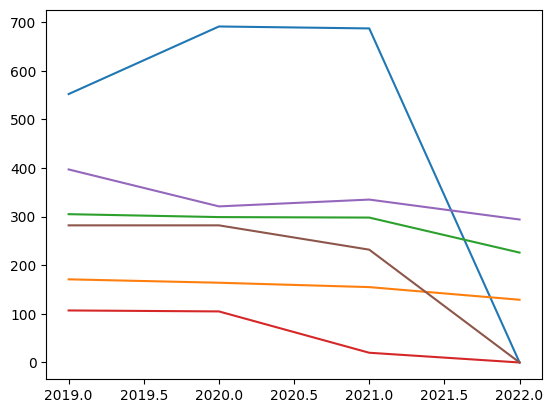

In [108]:
plt.plot(pivot_table.index, pivot_table['Aberdeenshire'] )
plt.plot(pivot_table.index, pivot_table['Adur'] )
plt.plot(pivot_table.index, pivot_table['Allerdale'] )
plt.plot(pivot_table.index, pivot_table['Alnwick'] )
plt.plot(pivot_table.index, pivot_table['Amber Valley'] )
plt.plot(pivot_table.index, pivot_table['Angus'] )
plt.show()

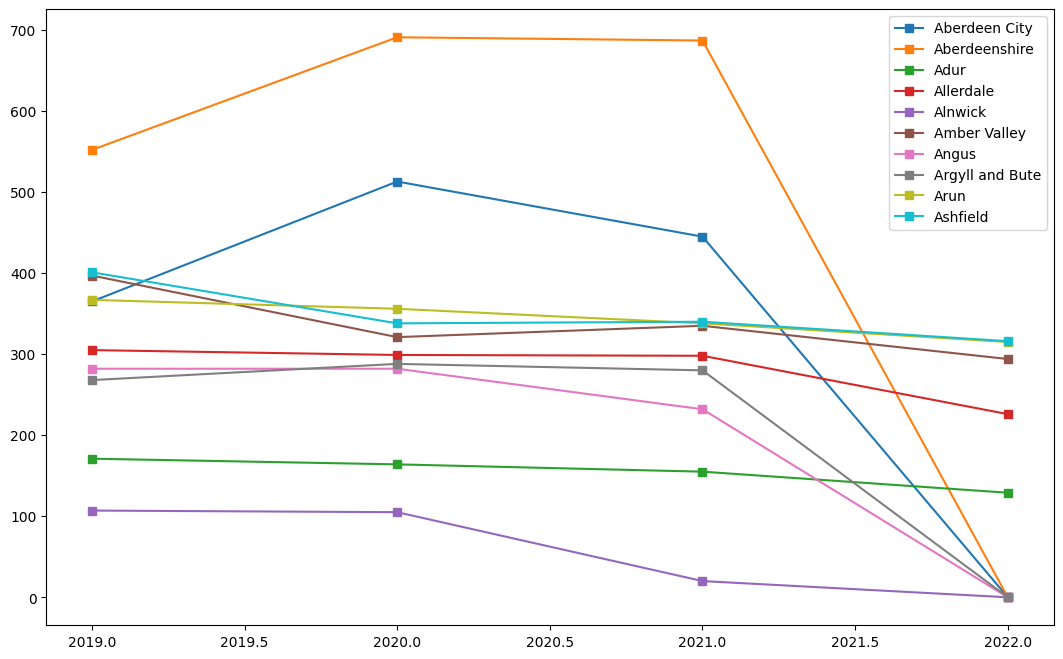

In [109]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label=x, marker ='s')
    if count == 10:
        break


plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

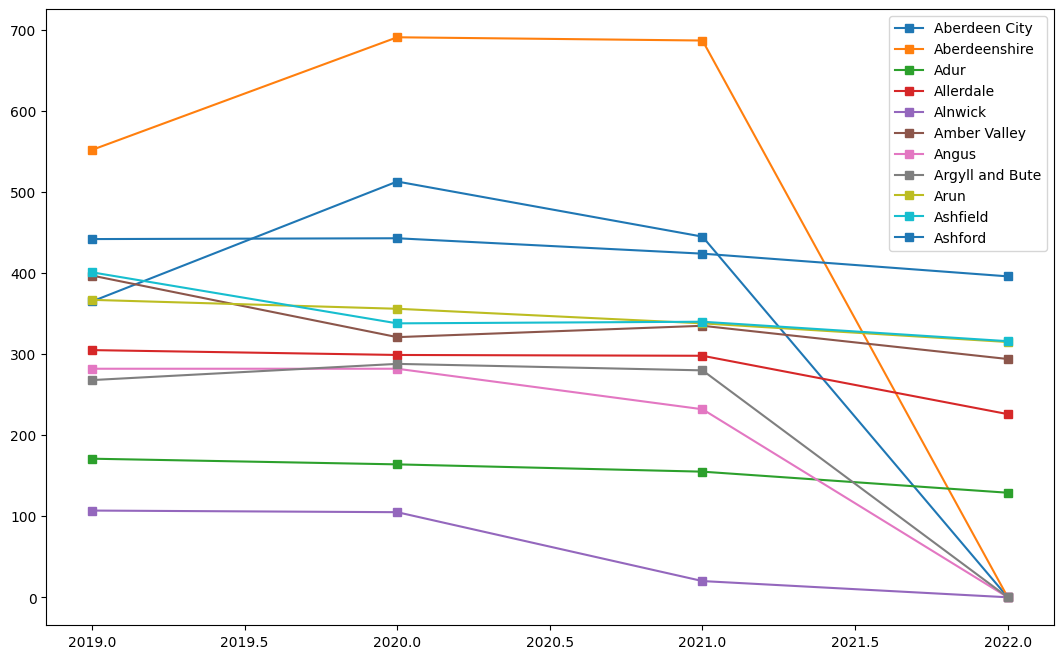

In [110]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label=x, marker ='s')
    if count >= 11 and count <=20:
        break


plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

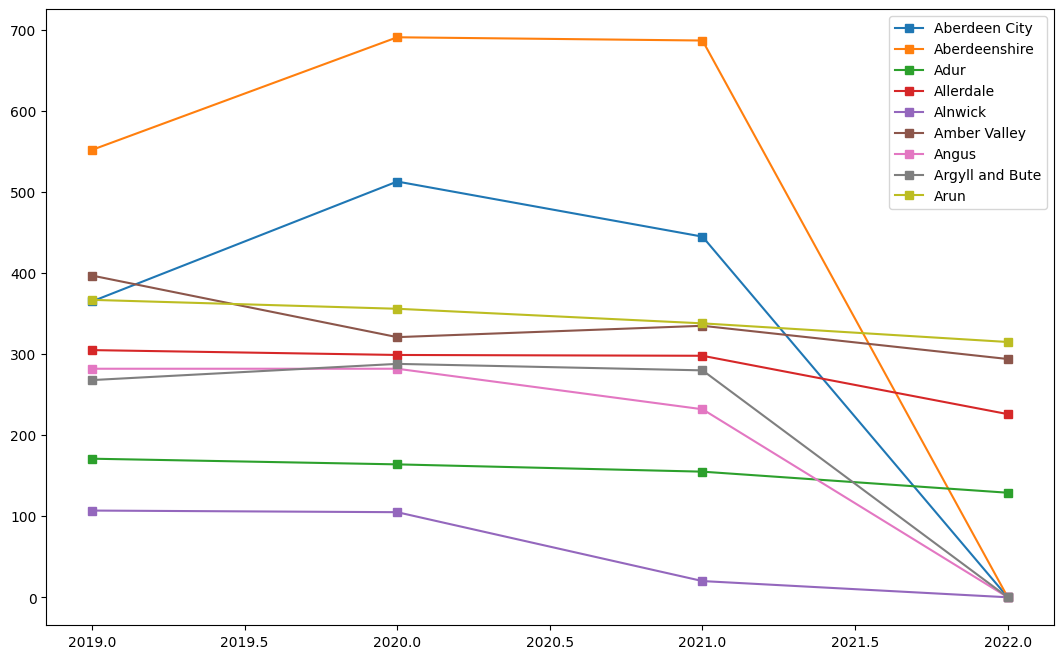

In [111]:
count = 21
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label=x, marker ='s')
    if count == 30:
        break


plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

<h1> VISUALIZING CORRELATION </h1>

C:\Users\LAB5-StudentPC12\AppData\Local\Temp\ipykernel_12612\970030927.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()


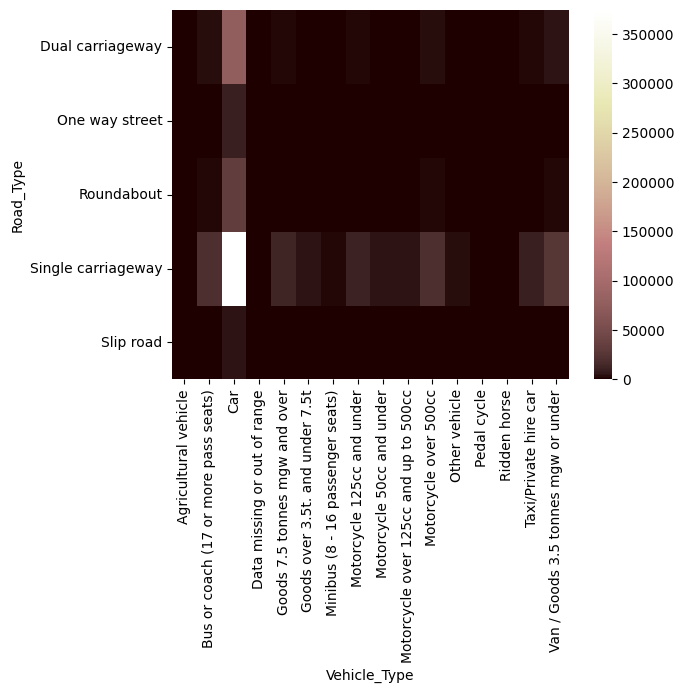

In [112]:
road = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()



sns.heatmap(road, cmap="pink")
plt.show()


C:\Users\LAB5-StudentPC12\AppData\Local\Temp\ipykernel_12612\3018007904.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road = accident.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack()


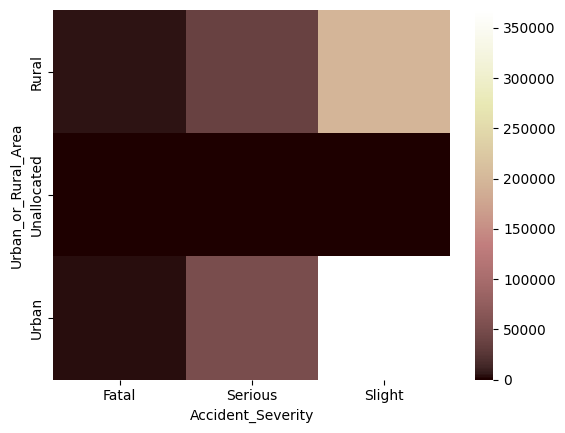

In [113]:
road = accident.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack()



sns.heatmap(road, cmap="pink")
plt.show()

In [114]:
accident.columns


Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')